# Introduction  

## Binary-Prediction-with-a-Rainfall-Dataset (Kaggle competition)

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Rainfall Prediction using Machine Learning dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

The dataset contains various meteorological attributes recorded over time. Below is a brief description of each column:

    ID: A unique identifier for each record.
    Day: Represents the day of the year (1 to 365).
    Pressure: Ranges from 999 to 1034.6 hPa.
    Temperature Features: Max temp (10.4°C - 36.0°C), Min temp (4.0°C - 29.8°C), and Average temp.
    Dew Point: Ranges from -0.3°C to 26.7°C.
    Humidity: Ranges from 39% to 98%.
    Cloud Cover: Ranges from 2% to 100%.
    Sunshine Duration: Ranges from 0 to 12.1 hours. 

This dataset provides essential meteorological variables, which can be useful for weather prediction models, climate analysis, and other predictive analytics.

# Importing Dependencies

In [273]:
import warnings
warnings.filterwarnings("ignore")

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

print("Libraries imported successfully!")

Libraries imported successfully!


# Loading Dataset

In [274]:
# loading the training data
train_path = './train.csv'
train_df = pd.read_csv(train_path)

# loading the testing data
test_path = './test.csv'
test_df = pd.read_csv(test_path)

## Train data

checking the train data head and tail

In [275]:
train_df.head(5)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [276]:
train_df.tail(5)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1
2189,2189,365,1013.8,21.2,19.1,18.0,18.0,89.0,88.0,1.0,70.0,48.0,1


In [277]:
# displaying the cols of train data,  shape 
train_df.columns, train_df.shape

(Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
        'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
        'windspeed', 'rainfall'],
       dtype='object'),
 (2190, 13))

In [278]:
# Displaying the info and description of the train data
print('Train data information:- \n')
train_df.info()

print('\nTrain data description:- ')
train_df.describe().T

Train data information:- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB

Train data description:- 


,count,mean,std,min,25%,50%,75%,max
id,2190.0,1094.500000,632.342866,0.0,547.250,1094.50,1641.750,2189.0
day,2190.0,179.948402,105.203592,1.0,89.000,178.50,270.000,365.0
pressure,2190.0,1013.602146,5.655366,999.0,1008.600,1013.00,1017.775,1034.6
maxtemp,2190.0,26.365799,5.654330,10.4,21.300,27.80,31.200,36.0
temparature,2190.0,23.953059,5.222410,7.4,19.300,25.50,28.400,31.5
mintemp,2190.0,22.170091,5.059120,4.0,17.700,23.85,26.400,29.8
dewpoint,2190.0,20.454566,5.288406,-0.3,16.800,22.15,25.000,26.7
humidity,2190.0,82.036530,7.800654,39.0,77.000,82.00,88.000,98.0
cloud,2190.0,75.721918,18.026498,2.0,69.000,83.00,88.000,100.0
sunshine,2190.0,3.744429,3.626327,0.0,0.400,2.40,6.800,12.1


In [279]:
# checking for missing values in the train data
train_df.isnull().sum()

# checking for zeros in the train data
train_df.isin([0]).sum()


id                 1
day                0
pressure           0
maxtemp            0
temparature        0
mintemp            0
dewpoint           0
humidity           0
cloud              0
sunshine         337
winddirection      0
windspeed          0
rainfall         540
dtype: int64

In [280]:
# checiking for duplicates in the train data
train_df.duplicated().sum()

np.int64(0)

## Test data

checking the test data head and tail

In [281]:
print('test data head:- \n')
test_df.head(5)

test data head:- 



,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [282]:
print('test data tail:- \n')
test_df.tail(5)

test data tail:- 



,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
725,2915,361,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3
726,2916,362,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2
727,2917,363,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9
728,2918,364,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,39.5
729,2919,365,1020.9,22.2,18.8,17.0,13.3,79.0,89.0,0.2,60.0,50.6


In [283]:
# checikng the cols of test data, shape
test_df.columns, test_df.shape

(Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
        'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
        'windspeed'],
       dtype='object'),
 (730, 12))

In [284]:
# checking the info and description of the test data
print('Test data information:- \n')
test_df.info()

print('\nTest data description:- ')
test_df.describe().T

Test data information:- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB

Test data description:- 


,count,mean,std,min,25%,50%,75%,max
id,730.0,2554.500000,210.877136,2190.0,2372.250,2554.50,2736.750,2919.0
day,730.0,183.000000,105.438271,1.0,92.000,183.00,274.000,365.0
pressure,730.0,1013.503014,5.505871,1000.0,1008.725,1012.70,1017.600,1032.2
maxtemp,730.0,26.372466,5.672521,7.4,21.600,27.80,31.000,35.8
temparature,730.0,23.963288,5.278098,5.9,19.825,25.65,28.375,31.8
mintemp,730.0,22.110274,5.170744,4.2,17.825,23.90,26.400,29.1
dewpoint,730.0,20.460137,5.391169,-0.0,16.800,22.30,25.000,26.7
humidity,730.0,82.669863,7.818714,39.0,77.250,82.00,89.000,98.0
cloud,730.0,76.360274,17.934121,0.0,69.000,83.00,88.000,100.0
sunshine,730.0,3.664384,3.639272,0.0,0.325,2.20,6.675,11.8


In [285]:
# checking for missing values in the test data
test_df.isnull().sum()


id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [286]:
# checking for zeros in the test data
test_df.isin([0]).sum()

id                 0
day                0
pressure           0
maxtemp            0
temparature        0
mintemp            0
dewpoint           1
humidity           0
cloud              1
sunshine         122
winddirection      0
windspeed          0
dtype: int64

In [287]:
# filling the missing values in the test data with the mean
test_df['winddirection'].fillna(test_df['winddirection'].mean(), inplace=True)

In [288]:
# checing for duplicates in the test data
test_df.duplicated().sum()

np.int64(0)

## Data overview

Train data shape = (2190, 13)

Test data shape = (730, 12) [rainfall is missing which is the target value]

# Data Visualization 

In [289]:
# creating a new temp dataframe for the train data
train_temp = train_df.copy()
test_temp = test_df.copy()
train_temp.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

<Axes: title={'center': 'Count of target variable rainfall'}, xlabel='Rainfall', ylabel='Count'>

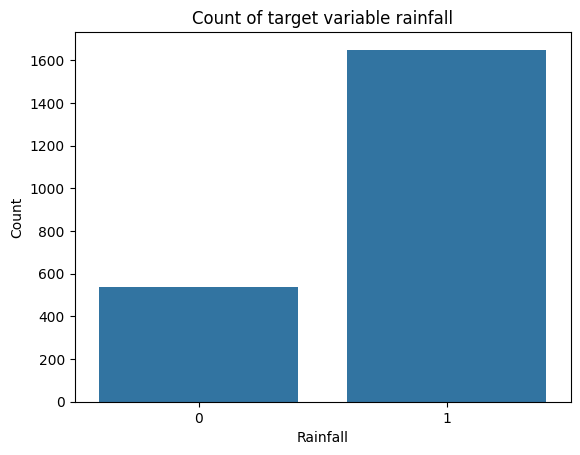

In [290]:
# checking if the data is imbalance or not 
plt.Figure(figsize=(8, 5))
plt.title('Count of target variable rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Count')
sns.countplot(x='rainfall', data=train_temp)

In [291]:
train_temp['rainfall'].value_counts()

rainfall
1    1650
0     540
Name: count, dtype: int64

Text(0.5, 0.93, 'Numerical Features Distributions\n\n\n')

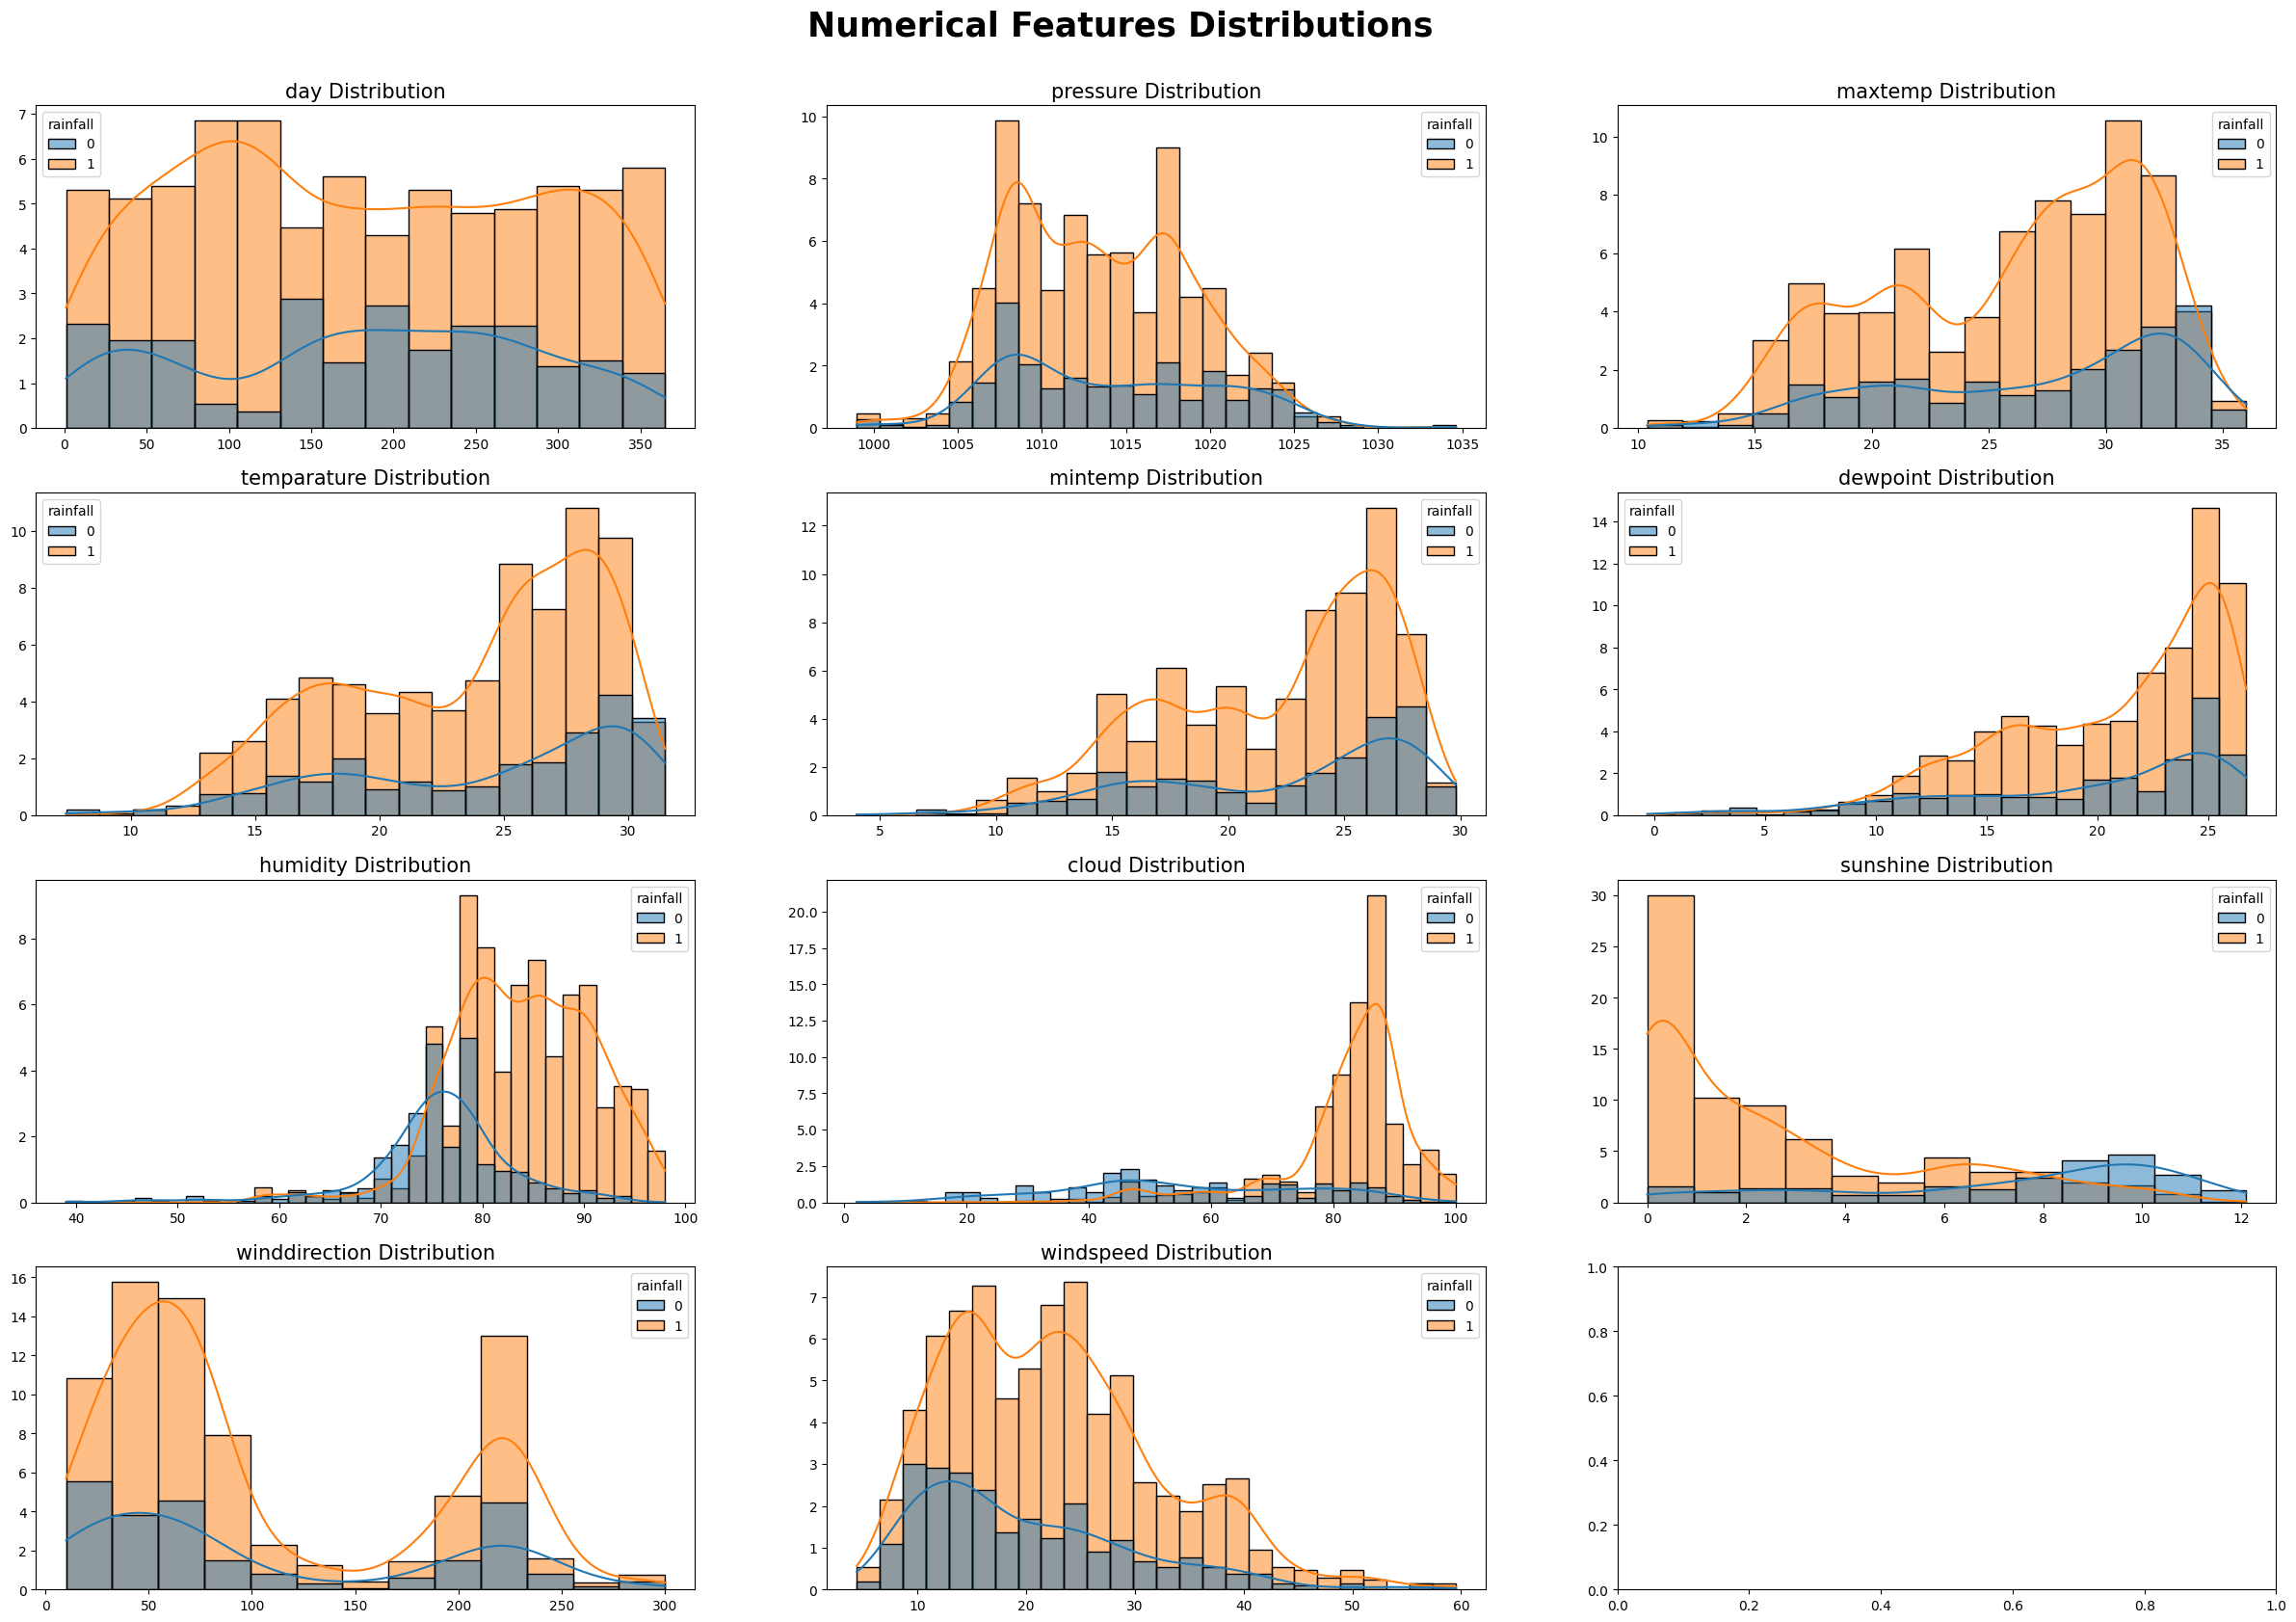

In [292]:
# numerical columns
numerical_col = ['day', 'pressure', 'maxtemp', 'temparature', 'mintemp','dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection','windspeed']

COLS = 3
ROWS = math.ceil(len(numerical_col)/COLS)

hist_param = {
    'kde': True,
    'bins': 'auto',
    'stat': 'percent'
}

# plotting the numerical columns
fig, ax = plt.subplots(ROWS, COLS, figsize=(30, 20))
ax = ax.ravel()

for i, col in enumerate(numerical_col):
    sns.histplot(x = col, ax=ax[i], **hist_param, hue='rainfall', data=train_temp)
    ax[i].set_title(f'{col} Distribution', fontsize=15)
    ax[i].set_xlabel(None, fontsize=16)  
    ax[i].set_ylabel(None, fontsize=16)

fig.suptitle(f'Numerical Features Distributions\n\n\n', ha='center', fontweight='bold', fontsize=25, y=0.93)

Text(0.5, 1.0, 'Correlation Matrix')

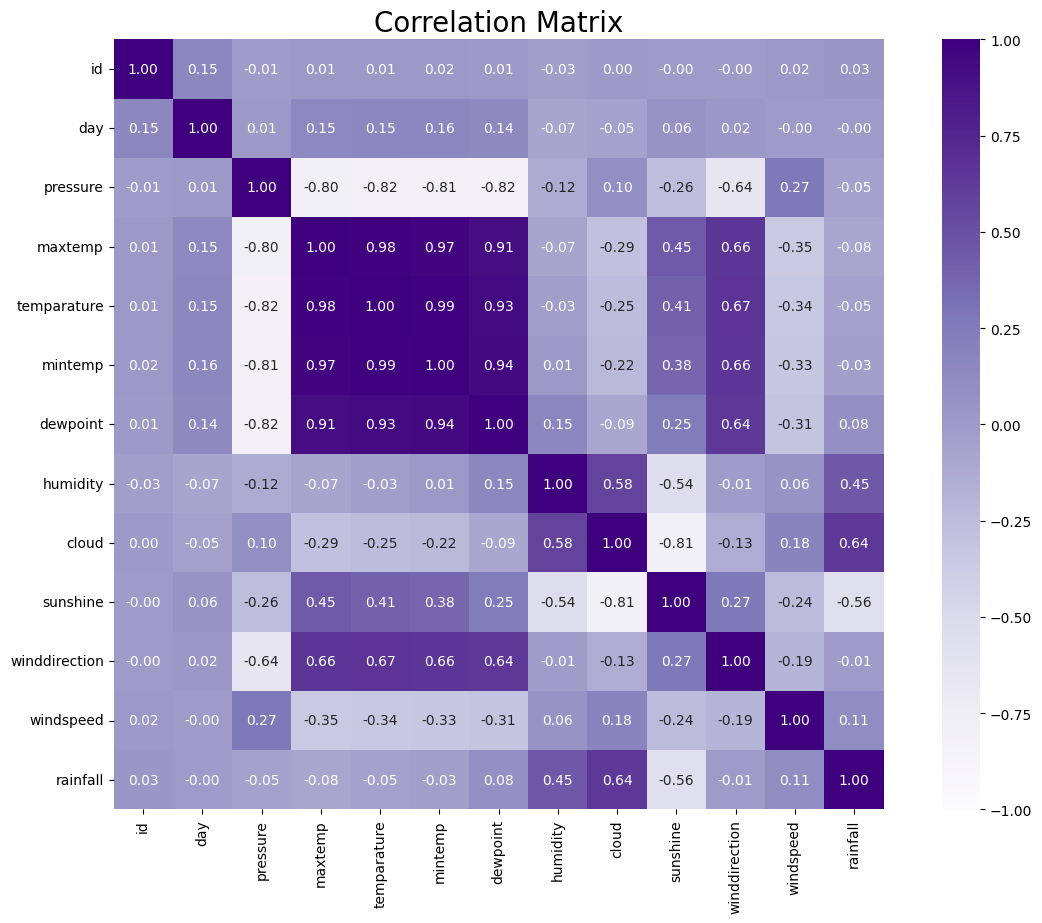

In [293]:
# correlation matrix
corr = train_temp.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='Purples', fmt='.2f', vmin=-1, vmax=1, square=True,)
plt.title('Correlation Matrix', fontsize=20)

### About correlation matix 

- `maxtemp`, `temperature`, `mintemp`, `dewpoint` are __highly correlated__ with each other
- `sunshine` is positively correlated with `maxtemp`, `temperature`, `mintemp`, `dewpoint` 
> (45%,41%,38%,25%)
- `humidity` is positively correlated with `cloud` by
> (58%)

### Detecting outliers using IQR method 

In [294]:
def detect_outliers_iqr(df, columns):
    outlier_summary = []

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)

        outlier_summary.append({
            'Column': col,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outlier Count': outlier_count
        })

    outlier_df = pd.DataFrame(outlier_summary)
    return outlier_df

In [295]:
outlier_summary = detect_outliers_iqr(train_temp, numerical_col)

print('Outlier Summary:- \n')
outlier_summary

Outlier Summary:- 



,Column,Lower Bound,Upper Bound,Outlier Count
0,day,-182.5000,541.5000,0
1,pressure,994.8375,1031.5375,4
2,maxtemp,6.4500,46.0500,0
3,temparature,5.6500,42.0500,0
4,mintemp,4.6500,39.4500,1
5,dewpoint,4.5000,37.3000,26
6,humidity,60.5000,104.5000,28
7,cloud,40.5000,116.5000,129
8,sunshine,-9.2000,16.4000,0
9,winddirection,-200.0000,440.0000,0


# Feature Engineering 

__making new features__

In [296]:
def get_season(month):
    if month in [12, 1, 2]:
        return 0 
    elif month in [3, 4, 5]:
        return 1 
    elif month in [6, 7, 8]:
        return 2 
    else:
        return 3 

def new_features(data):

    data['day'] = pd.to_datetime(data['day'])
    data['month'] = data['day'].dt.month
    data['season'] = data['month'].apply(get_season)
    data['day_of_week']=data['day'].dt.weekday
    data['is_weekend'] =data['day_of_week'].isin([5,6]).astype(int)

    data['season'] = data['day'].apply(get_season)
    data['day_of_year'] = data['day'].dt.dayofyear
    data['sin_day'] = np.sin(2 * np.pi * data['day_of_year'] / 365)
    data['cos_day'] = np.cos(2 * np.pi * data['day_of_year'] / 365)

    data['temp_range'] = data['maxtemp'] - data['mintemp']
    data['temp_variablity'] = data[['maxtemp', 'mintemp']].std(axis=1)
    data['temp_dev_from_min'] = data['temparature'] - data['mintemp']
    data['temp_dev_from_max'] = data['maxtemp'] - data['temparature']
    data['temp_total_avg'] = data[['maxtemp', 'mintemp', 'temparature']].mean(axis=1)
    data['temp_max_min_ratio'] = data['maxtemp'] / data['mintemp']

    data['wind_effect'] = data['windspeed'] * data['winddirection'] 
    
    data['cloud_per_sunshine'] = data['cloud'] / (data['sunshine'] + 1)

    # wind direction in radians 
    data['winddirection_rad'] = np.radians(data['winddirection'])
    data['wind_dir_sin'] = np.sin(data['winddirection_rad'])
    data['wind_dir_cos'] = np.cos(data['winddirection_rad'])
    data.drop('winddirection_rad', axis=1, inplace=True)

    # moving average 
    data['MA_temp'] = data['temp_total_avg'].rolling(window=8).mean()
    data['MA_windspeed'] = data['windspeed'].rolling(window=8).mean()
    data['MA_humidity'] = data['humidity'].rolling(window=8).mean()

    # lag features
    data['lag_temp'] = data['temp_total_avg'].shift(1)
    data['lag_humidity'] = data['humidity'].shift(1)
    data['lag_windspeed'] = data['windspeed'].shift(1)
    
    return data


In [297]:
train_df = new_features(train_df)
test_df = new_features(test_df)

In [298]:
train_df.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall', 'month', 'season', 'day_of_week', 'is_weekend',
       'day_of_year', 'sin_day', 'cos_day', 'temp_range', 'temp_variablity',
       'temp_dev_from_min', 'temp_dev_from_max', 'temp_total_avg',
       'temp_max_min_ratio', 'wind_effect', 'cloud_per_sunshine',
       'wind_dir_sin', 'wind_dir_cos', 'MA_temp', 'MA_windspeed',
       'MA_humidity', 'lag_temp', 'lag_humidity', 'lag_windspeed'],
      dtype='object')

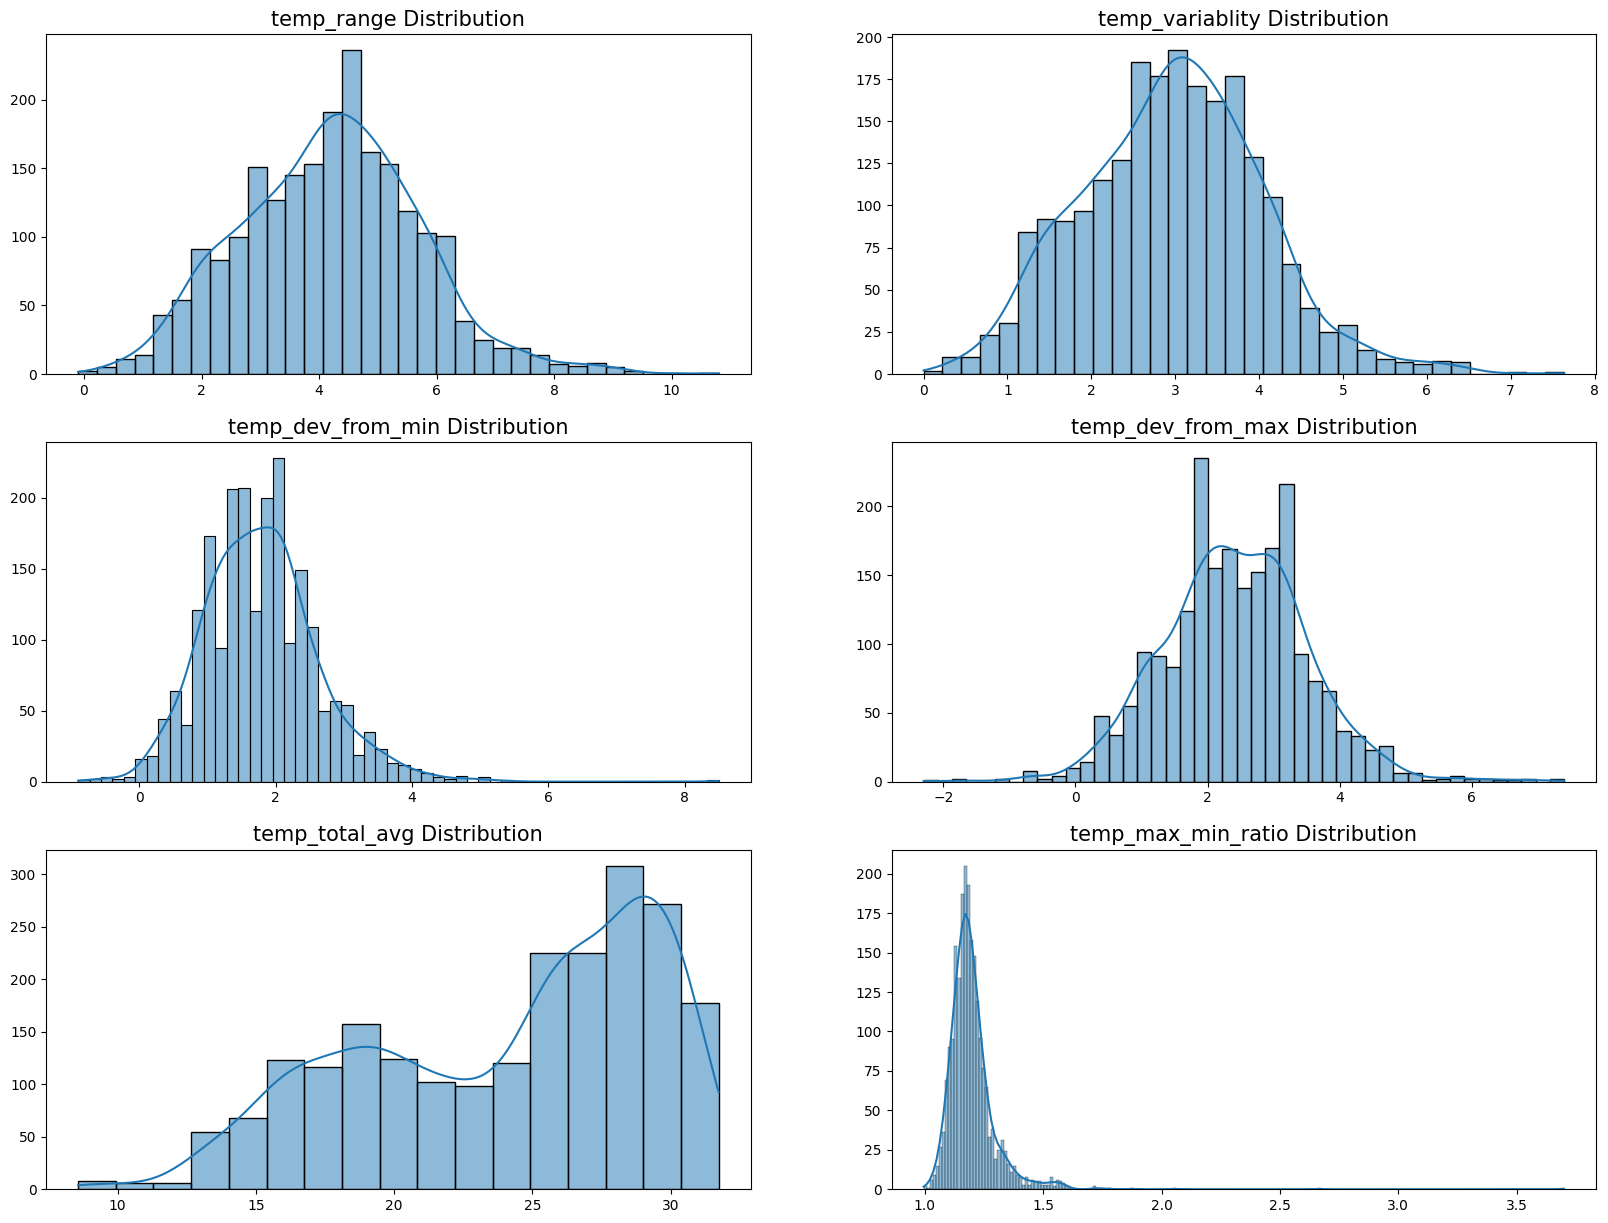

In [299]:
new_temp_col = [col for col in train_df.columns if col.startswith('temp_')]

fig, ax = plt.subplots(3,2, figsize=(20, 15))
ax = ax.ravel()


for i, col in enumerate(new_temp_col):
    sns.histplot(x = col, ax=ax[i], data=train_df, kde=True)
    ax[i].set_title(f'{col} Distribution', fontsize=15)
    ax[i].set_xlabel(None, fontsize=16)
    ax[i].set_ylabel(None, fontsize=16)

In [300]:
# dropping some cols
drop_col = ['id', 'day', 'day_of_year']
train_df.drop(drop_col, axis=1, inplace=True)
test_df.drop(drop_col, axis=1, inplace=True)

In [301]:
train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)

# Model Building

In [302]:
# selecting the features and target variable
X = train_df.drop('rainfall', axis=1)
y = train_df['rainfall']

In [303]:
X.shape, y.shape

((2190, 32), (2190,))

In [304]:
# splitting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [305]:
# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [306]:
base_model = LogisticRegression(max_iter=200, solver='saga')

In [307]:
logistic_bagging = BaggingClassifier(estimator=base_model, n_estimators=150, random_state=42)

In [308]:
# params for logistic regression
parameter = {
    'estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'estimator__C': [0.1, 1, 10],
    'estimator__l1_ratio': [0.1, 0.5, 0.9],
    'estimator__class_weight': ['balanced', None]
}

In [309]:
# bagging_gcv = GridSearchCV(logistic_bagging, param_grid=parameter, cv=5, scoring='roc_auc', verbose=10)
# bagging_gcv.fit(X_train, y_train)

In [310]:
# print(f'best score is {bagging_gcv.best_score_}')
# print(f'best estimator is {bagging_gcv.best_estimator_}')

In [311]:
final_bagging_model =BaggingClassifier(estimator=LogisticRegression(C=0.1, l1_ratio=0.9,max_iter=200,penalty='elasticnet',solver='saga'), n_estimators=150, random_state=42)

final_bagging_model.fit(X_train, y_train)

y_pred_proba = final_bagging_model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f'ROC_AUC score is {roc_auc}')

ROC_AUC score is 0.8699718131766813


## logistic bagging final fit

In [312]:
final_bagging_model.fit(X, y)

BaggingClassifier(estimator=LogisticRegression(C=0.1, l1_ratio=0.9,
                                               max_iter=200,
                                               penalty='elasticnet',
                                               solver='saga'),
                  n_estimators=150, random_state=42)

Splitting the test data

In [315]:
# storing ID from the test data copy
test_id = test_temp['id']
test_id

0      2190
1      2191
2      2192
3      2193
4      2194
       ... 
725    2915
726    2916
727    2917
728    2918
729    2919
Name: id, Length: 730, dtype: int64

In [317]:
# scaling the test data
test_data = scaler.transform(test_df)

In [321]:
# making predictions
test_predictions = final_bagging_model.predict_proba(test_data)[:, 1]

# creating a dataframe for the submission
submission = pd.DataFrame({'id': test_id, 'rainfall': test_predictions})

# Save to CSV
submission.to_csv('submission.csv', index=False)